In [1]:
pwd

'C:\\Users\\danie\\Shift Academy Data Science Bootcamp Batch 10'

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

%matplotlib inline
matplotlib.style.use('seaborn')

## Import Dataset and Quick Look

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2.a. Tunjukan analisa statistika deksriptif untuk variabel harga rumah (Column Name: (SalePrice))

In [6]:
# Describe digunakan untuk menjelaskan semua analisa statistika deksriptif hanya khusus pada SalePrice
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
# Mean
print('Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Mean =', data['SalePrice'].mean())

Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Mean = 180921.19589041095


In [8]:
# Median
print('Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Median =', data['SalePrice'].median())

Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Median = 163000.0


In [9]:
# Mode
print('Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Mode =', data['SalePrice'].mode())

Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Mode = 0    140000
dtype: int64


In [10]:
# Count
print('Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Count =', data['SalePrice'].count())

Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Count = 1460


In [11]:
# Max
print('Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Max =', data['SalePrice'].max())

Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Max = 755000


In [12]:
# Min
print('Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Min =', data['SalePrice'].min())

Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Min = 34900


In [13]:
# Quartile
print('Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Q1, Q2, dan Q3 =')
data['SalePrice'].quantile([0.25, 0.5, 0.75])

Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Q1, Q2, dan Q3 =


0.25    129975.0
0.50    163000.0
0.75    214000.0
Name: SalePrice, dtype: float64

In [14]:
# Percentile
print('Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai P90, P95, dan P99 =')
data['SalePrice'].quantile([0.90, 0.95, 0.99])

Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai P90, P95, dan P99 =


0.90    278000.00
0.95    326100.00
0.99    442567.01
Name: SalePrice, dtype: float64

In [15]:
# Variance
print('Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Variance =', data['SalePrice'].var())

Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Variance = 6311111264.297451


In [16]:
# Standart Deviation
print('Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Standart Deviation =', data['SalePrice'].std())

Analisa deskriptif untuk variabel harga rumah (Column Name: (SalePrice)) - Nilai Standart Deviation = 79442.50288288663


## 2.b. Tunjukan analisa statistika deksriptif untuk variabel harga rumah (Column Name: (SalePrice)) dan Setiap tahunnya (Column Name: YrSold)

In [17]:
# Describe digunakan untuk menjelaskan semua analisa statistika deksriptif hanya khusus pada SalePrice
data.groupby('YrSold')['SalePrice'].agg(['mean', 'median', statistics.mode, 'count', 'max', 'min', 'quantile', 'var', 'std'])

,mean,median,mode,count,max,min,quantile,var,std
YrSold,,,,,,,,,
2006,182549.458599,163995,140000,314,625000,35311,163995.0,6.308623e+09,79426.838855
2007,186063.151976,167000,144000,329,755000,39300,167000.0,7.356179e+09,85768.171410
2008,177360.838816,164000,140000,304,446261,40000,164000.0,4.863055e+09,69735.610685
2009,179432.103550,162000,110000,338,582933,34900,162000.0,6.541451e+09,80879.237311
2010,177393.674286,155000,140000,175,611657,55000,155000.0,6.472408e+09,80451.280085


## 2.c. Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk analisa apakah lebih baik menggunakan mean atau menggunakan median? Beserta alasannya (Column Name : SalePrice)

In [24]:
SalePricePerYear = data.groupby('YrSold')['SalePrice'].agg(['mean'])

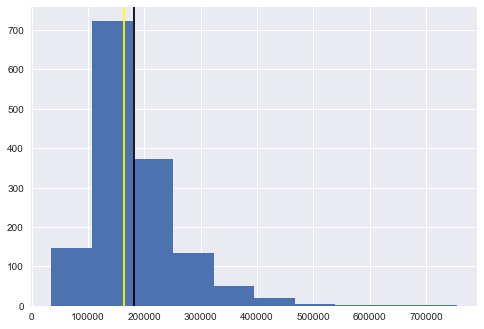

In [51]:
# Histogram using matplotlib.pyplot --> Positive Skew
plt.hist(data['SalePrice'])
plt.axvline(data['SalePrice'].median(),color='yellow')
plt.axvline(data['SalePrice'].mean(),color='black')
plt.show()

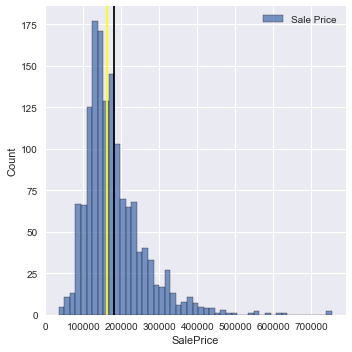

In [50]:
# Histogram using seaborn --> Positive Skew
sns.displot(data['SalePrice'], label='Sale Price')
plt.axvline(data['SalePrice'].median(),color='yellow')
plt.axvline(data['SalePrice'].mean(),color='black')
plt.legend()
plt.show()

## Box Plot

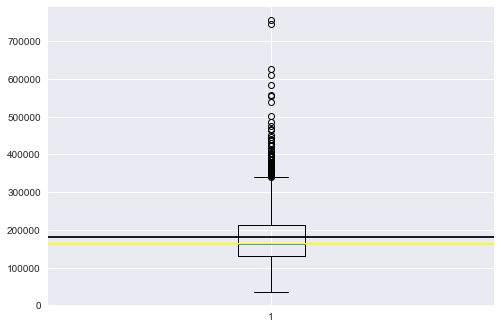

In [37]:
plt.boxplot(data['SalePrice'])
plt.axhline(data['SalePrice'].median(),color='yellow')
plt.axhline(data['SalePrice'].mean(),color='black')
plt.show()

## Positive Linear Model

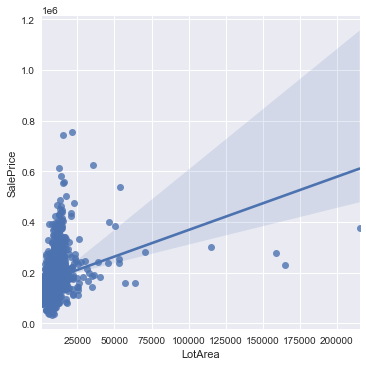

In [45]:
# Positive Linear Model between LotArea vs SalePrice
sns.lmplot(x='LotArea', y='SalePrice', data=data)

## Cat Plot

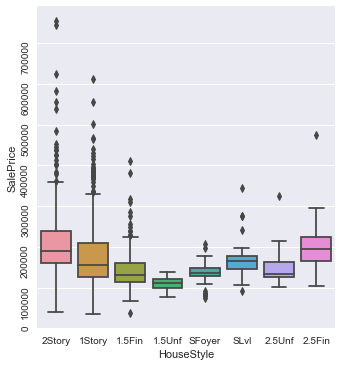

In [42]:
# House Style 2Story Tipe is most favourit than the others, but have the most outlier too 
sns.catplot(x='HouseStyle', y='SalePrice', kind='box', data=data)
plt.yticks(rotation=90)
plt.show()

## Jelaskan sebaiknya untuk analisa apakah lebih baik menggunakan mean atau menggunakan median? Beserta alasannya
Lebih baik menggunakan nilai median untuk menganalisis secara statistik karena nilai median adalah nilai tengah, dan mendekati nilai penyebaran distribusi normalnya (positive skew). Jika menggunakan mean atau rata-rata, akan kurang efektif karena nilai rata-rata akan sangat berpengaruh dengan adanya kehadiran outlier.